t

this is a sales dataset, i'll be making some overview analysis

In [137]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel("Online Retail.xlsx")
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [141]:

data["DayOfWeek"] = data["InvoiceDate"].dt.day_of_week
data["hour"] = data["InvoiceDate"].dt.hour
data["revenue"] = data["UnitPrice"]*data["Quantity"]



Text(0.5, 1.0, 'total sales per day')

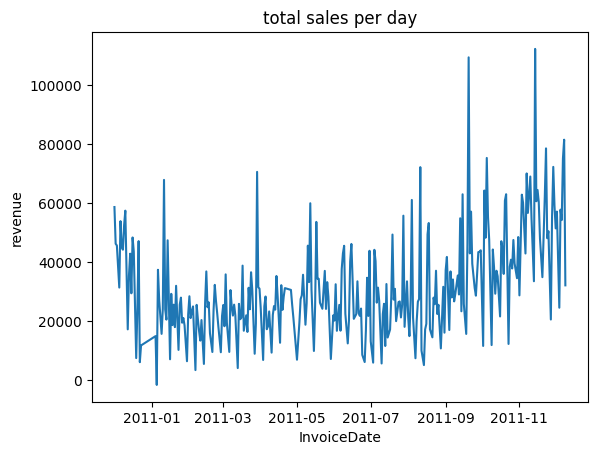

In [148]:
daily = data.groupby(data["InvoiceDate"].dt.date)["revenue"].sum()
sns.lineplot(daily)
plt.title("total sales per day")

this 

Text(0.5, 1.0, 'total sales per month')

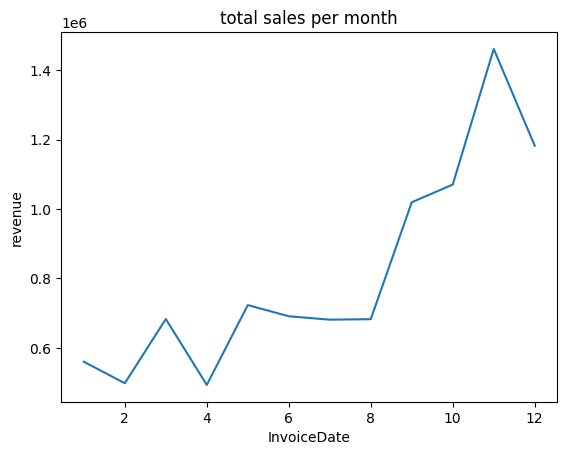

In [150]:
monthly = data.groupby(data["InvoiceDate"].dt.month)["revenue"].sum()
#monthly.head(12)
sns.lineplot(monthly)
plt.title("total sales per month")

In [132]:
monthly = data.groupby(data["InvoiceDate"].dt.dayofweek)["revenue"].sum()
monthly.head(12)

InvoiceDate
0    1588609.431
1    1966182.791
2    1734147.010
3    2112519.000
4    1540610.811
6     805678.891
Name: revenue, dtype: float64

why thurnsday?

In [124]:
unique = data["Description"].unique()
print(unique[:20])


['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT'
 "POPPY'S PLAYHOUSE BEDROOM " "POPPY'S PLAYHOUSE KITCHEN"
 'FELTCRAFT PRINCESS CHARLOTTE DOLL' 'IVORY KNITTED MUG COSY '
 'BOX OF 6 ASSORTED COLOUR TEASPOONS' 'BOX OF VINTAGE JIGSAW BLOCKS '
 'BOX OF VINTAGE ALPHABET BLOCKS' 'HOME BUILDING BLOCK WORD'
 'LOVE BUILDING BLOCK WORD' 'RECIPE BOX WITH METAL HEART']


In [125]:
most_revenue = data.groupby(data["Description"])["revenue"].sum()
sorted_most = most_revenue.sort_values(ascending=False)
sorted_most.head(20)


Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
SPOTTY BUNTING                         42065.32
JUMBO BAG PINK POLKADOT                41619.66
BLACK RECORD COVER FRAME               40596.96
PICNIC BASKET WICKER 60 PIECES         39619.50
SET OF 3 CAKE TINS PANTRY DESIGN       37413.44
DOORMAT KEEP CALM AND COME IN          36565.39
JAM MAKING SET WITH JARS               36116.09
WOOD BLACK BOARD ANT WHITE FINISH      35859.27
LUNCH BAG RED RETROSPOT                34897.31
POPCORN HOLDER                         33969.46
Name: revenue, dtype: float6

<Axes: ylabel='Description'>

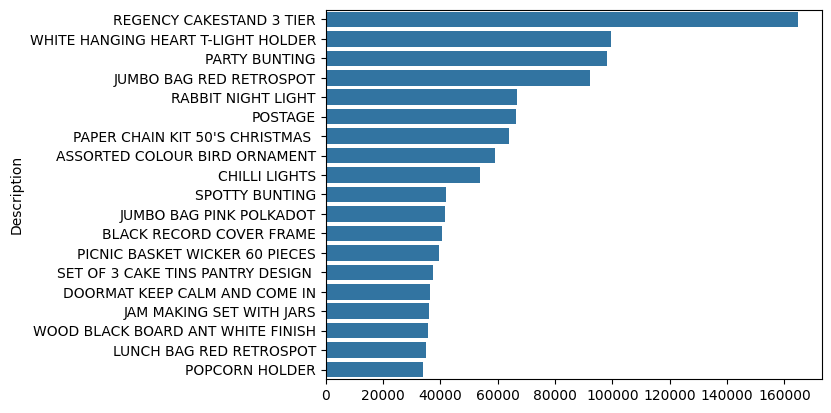

In [126]:
top20 = sorted_most[1:20]

sns.barplot(x = top20.values, y = top20.index)

<Axes: xlabel='revenue', ylabel='Density'>

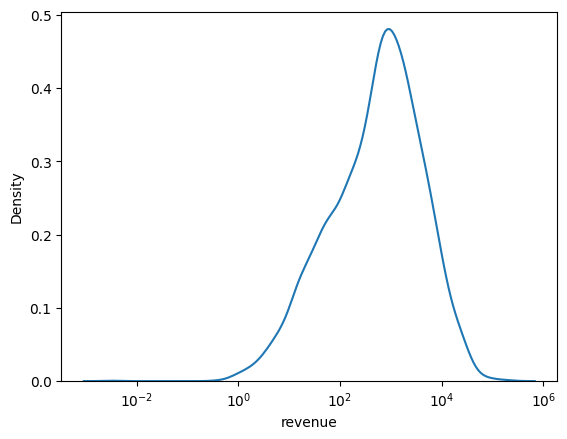

In [127]:
positive = most_revenue[most_revenue > 0]
sns.kdeplot(positive[1:],log_scale = True)


<Axes: ylabel='Country'>

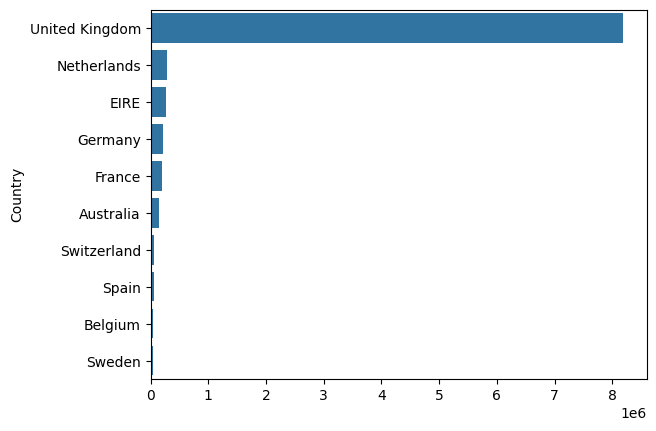

In [ ]:
by_country = data.groupby(data["Country"])["revenue"].sum()
sorted_coutry = by_country.sort_values(ascending=False)
#print(sorted_coutry)
topcoutries = sorted_coutry[:10]
sns.barplot(x = topcoutries.values, y = topcoutries.index)